1. Goal & Dataset

Dataset: king_ country_ houses_aa.csv with 21,613 rows and 25 columns.

Target: predict house price (price column).
Model: RandomForestRegressor

In [138]:
!pip install seaborn

2. Basic Data Loading & Date Handling

We started by:

Loading the data into a pandas DataFrame: house_data.

Converting the date column to datetime, to avoid string issues:

In [139]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.metrics import accuracy_score

In [140]:
#collumns to drop = date, 

In [141]:
house_data = pd.read_csv('house_data_cleaned4.csv')


In [142]:
house_data.shape

(21613, 6)

In [143]:
house_data.isna().sum()

bathrooms       0
waterfront      0
grade           0
house_age       0
log_price       0
log_sqft_lot    0
dtype: int64

In [144]:
house_data.fillna(method='ffill', inplace=True)

C:\Users\vigus\AppData\Local\Temp\ipykernel_5032\2155536620.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  house_data.fillna(method='ffill', inplace=True)


In [145]:
house_data.isna().sum()

bathrooms       0
waterfront      0
grade           0
house_age       0
log_price       0
log_sqft_lot    0
dtype: int64

In [146]:
print(house_data.head())

   bathrooms  waterfront  grade  house_age  log_price  log_sqft_lot
0       1.00           0      7         60  12.309982      8.639411
1       2.25           0      7         64  13.195614      8.887653
2       1.00           0      6         82  12.100712      9.210340
3       3.00           0      7         50  13.311329      8.517193
4       2.00           0      8         28  13.142166      8.997147


In [147]:
print(house_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   bathrooms     21613 non-null  float64
 1   waterfront    21613 non-null  int64  
 2   grade         21613 non-null  int64  
 3   house_age     21613 non-null  int64  
 4   log_price     21613 non-null  float64
 5   log_sqft_lot  21613 non-null  float64
dtypes: float64(3), int64(3)
memory usage: 1013.2 KB
None


In [148]:
print(house_data.describe())

          bathrooms    waterfront         grade     house_age     log_price  \
count  21613.000000  21613.000000  21613.000000  21613.000000  21613.000000   
mean       2.114757      0.007542      7.656873     43.994864     13.047817   
std        0.770163      0.086517      1.175459     29.373411      0.526685   
min        0.000000      0.000000      1.000000      0.000000     11.225243   
25%        1.750000      0.000000      7.000000     18.000000     12.682152   
50%        2.250000      0.000000      7.000000     40.000000     13.017003   
75%        2.500000      0.000000      8.000000     64.000000     13.377006   
max        8.000000      1.000000     13.000000    115.000000     15.856731   

       log_sqft_lot  
count  21613.000000  
mean       8.989956  
std        0.902425  
min        6.253829  
25%        8.525161  
50%        8.938269  
75%        9.276877  
max       14.317109  


In [149]:
house_data.head(12)

,bathrooms,waterfront,grade,house_age,log_price,log_sqft_lot
0,1.00,0,7,60,12.309982,8.639411
1,2.25,0,7,64,13.195614,8.887653
2,1.00,0,6,82,12.100712,9.210340
3,3.00,0,7,50,13.311329,8.517193
4,2.00,0,8,28,13.142166,8.997147
5,4.50,0,11,14,14.018451,11.532042
6,2.25,0,7,20,12.458775,8.827468
7,1.50,0,7,52,12.583995,9.181015
8,1.00,0,7,55,12.343658,8.918650
9,2.50,0,7,12,12.685408,8.788746


In [150]:
house_data_cleaned["zipcode"].nunique()

70

2. Basic Data Loading & Date Handling

We started by:

Loading the data into a pandas DataFrame: house_data.

Converting the date column to datetime, to avoid string issues:

Remove noisy engineered features


Creating new features:

convert yr_renovated to binary

Bath per bedroom (avoid division by zero)

House age instead of year built

Handle infinities and NaNs

Fill numeric NaNs with median of each column

In [151]:
#Convert yr_renovated to binary
if "yr_renovated" in house_data.columns:
    house_data["renovated"] = (house_data["yr_renovated"] > 0).astype(int)
    house_data.drop("yr_renovated", axis=1, inplace=True)
else:
    print("Column 'yr_renovated' not found. Available columns:", list(house_data.columns))

Column 'yr_renovated' not found. Available columns: ['bathrooms', 'waterfront', 'grade', 'house_age', 'log_price', 'log_sqft_lot']


3. Important Features (What we decided to keep)

From the original dataset, the truly important features for price are:

In [152]:
num_cols = ["price","sqft_living","sqft_lot","sqft_above","sqft_basement","sqft_living15","sqft_lot15"]
for c in num_cols:
    house_data_cleaned = house_data_cleaned[house_data_cleaned[c] < house_data_cleaned[c].quantile(0.99)]

In [153]:
# Handle infinities and NaNs
house_data_cleaned = house_data_cleaned.replace([np.inf, -np.inf], np.nan)

# Fill numeric NaNs with median of each column
house_data_cleaned = house_data_cleaned.fillna(house_data_cleaned.median(numeric_only=True))


5. Correlation map of cleaned data

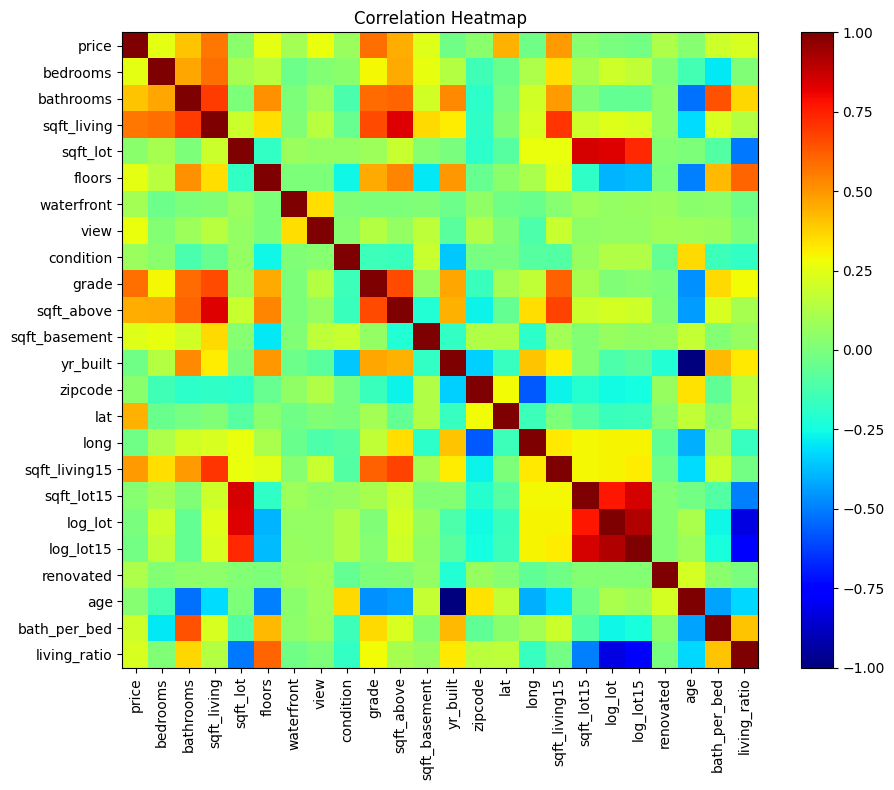

In [165]:
#Correlation heatmap
correlation = house_data_cleaned.select_dtypes(include='number').corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
plt.imshow(correlation, cmap='jet', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(correlation.columns)), correlation.columns, rotation=90)
plt.yticks(range(len(correlation.columns)), correlation.columns)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

6. Target Leakage & Using X/y Correctly

In [155]:
# X(Independent variables) and y(target variables) 
y = np.log1p(house_data_cleaned["price"])  
X = house_data_cleaned.drop(columns=["price"], errors="ignore")

print("Final feature columns:", X.columns)
print("Number of features:", X.shape[1])

Final feature columns: Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'log_lot', 'log_lot15', 'renovated', 'age',
       'bath_per_bed', 'living_ratio'],
      dtype='object')
Number of features: 23


7. Encode zipcode

In [156]:
#Encode zipcode
if "zipcode" in X.columns:
    X = pd.get_dummies(X, columns=["zipcode"], drop_first=True)

8. Train-test split

In [157]:
# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

In [158]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

9. RandomForestRegressor:

In [159]:
# RandomForestRegressors
model = RandomForestRegressor(
    n_estimators=600,
    max_depth=30,
    min_samples_leaf=2,
    min_samples_split=6,
    max_features="sqrt",
    bootstrap=True,
    random_state=42,
    n_jobs=-1
)

model.fit(X_train, y_train)

# Train the model
y_pred_log = model.predict(X_test)

# Convert predictions back to real prices
y_pred = np.expm1(y_pred_log)

# Convert ground truth back to real prices too
y_test_real = np.expm1(y_test)

# Remove any inf / nan that may appear
import numpy as np

mask = np.isfinite(y_pred) & np.isfinite(y_test_real)

y_pred = y_pred[mask]
y_test_real = y_test_real[mask]

# Now compute metrics safely
mse = mean_squared_error(y_test_real, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_real, y_pred)

print("\n=== RandomForestRegressor Performance ===")
print("MSE :", mse)
print("RMSE:", rmse)
print("R²  :", r2)


=== RandomForestRegressor Performance ===
MSE : 8395541115.065722
RMSE: 91627.18545860569
R²  : 0.8208584872062623


10. Feature importance

In [160]:
# Feature importance
feature_importances = pd.Series(
    model.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

print("\nTop 20 Most Important Features:")
print(feature_importances.head(20))


Top 20 Most Important Features:
lat              0.263536
sqft_living      0.099539
grade            0.098044
sqft_living15    0.067949
sqft_above       0.062088
living_ratio     0.040494
long             0.032694
bathrooms        0.029887
age              0.026107
yr_built         0.024984
log_lot15        0.022230
sqft_lot15       0.021553
sqft_basement    0.020578
bath_per_bed     0.017774
sqft_lot         0.017378
log_lot          0.017263
floors           0.015463
view             0.015443
bedrooms         0.011830
zipcode_98004    0.008464
dtype: float64


11. Model Testing

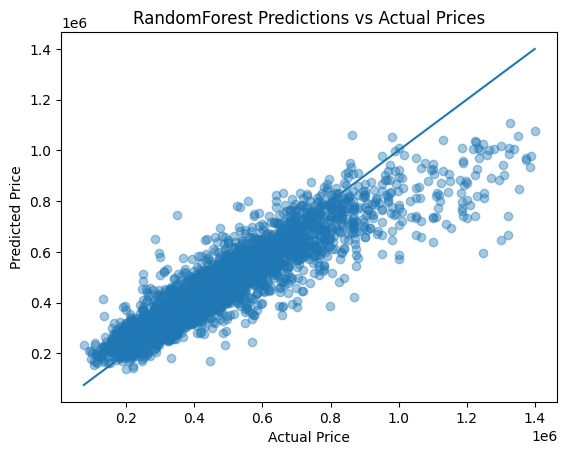

In [161]:
plt.figure()
plt.scatter(y_test_real, y_pred, alpha=0.4)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("RandomForest Predictions vs Actual Prices")
plt.plot([y_test_real.min(), y_test_real.max()],
         [y_test_real.min(), y_test_real.max()])
plt.show()

In [162]:
# Rsquared cross validation
from sklearn.model_selection import cross_val_score

# Rsquared cross validation
scores = cross_val_score(model, X, y, cv=5, scoring="r2", n_jobs=-1)

print("CV R² scores:", scores)
print("CV Mean R²:", scores.mean())

CV R² scores: [0.84296759 0.83260327 0.83998987 0.84227995 0.84008069]
CV Mean R²: 0.8395842746897575


In [163]:
print("RMSE / mean price:", rmse / y_test_real.mean())

RMSE / mean price: 0.19737891928992352


In [167]:
sample_house = X_test.iloc[0:1]
predicted_price = np.expm1(model.predict(sample_house))[0]

print("Predicted price:", round(predicted_price, 2))
print("Actual price   :", round(y_test_real.iloc[0], 2))


Predicted price: 397979.44
Actual price   : 355500.0
